## Clustering

클러시터링에서 각 샘플의 레이블은 알고리즘이 샘플에 할당한 클러스터의 인덱스 이다.(비지도 학습이기 때문) 분류에서의 인텍스는 클래스 레이블.

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = "."
CHAPTER_ID = 'unsupervised_learning'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
    
import warnings
warnings.filterwarnings(action='ignore', message='internal gelsd')

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

그림 저장: classification_vs_clustering_plot


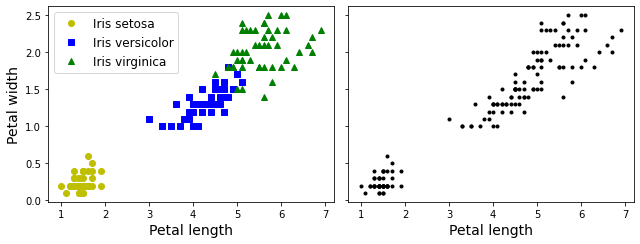

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

#(좌)레이블이 있는 경우, (우)레이블이 없는 경우

### K-means

k-평균 알고리즘은 초기에 무작위로 센트로이드를 선정한 뒤, 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 것을 반복하여 센트로이드에 변화가 없으면 멈춘다. k-균은 가장 빠른 군집 알고리즘 중 하나이다.

In [5]:
# 예제데이터 생성
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [6]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                 cluster_std=blob_std, random_state=7)

데이터로 그래프 그리기

In [7]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

그림 저장: blobs_plot


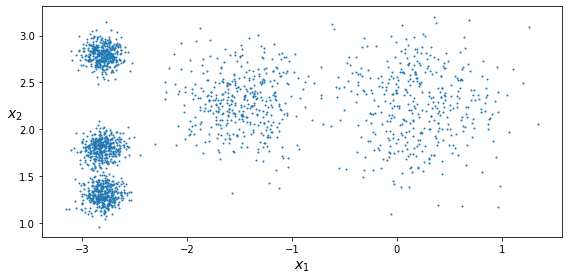

In [8]:
plt.figure(figsize=(8,4))
plot_clusters(X)
save_fig('blobs_plot')
plt.show()

k-means 군집 알고리즘 훈련하기  
k-means: 클러스터 중심을 찾고 각 샘플을 가까운 클러스터에 할당

In [9]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k, random_state = 42)
y_pred = kmeans.fit_predict(X)

In [10]:
 y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [11]:
y_pred is kmeans.labels_

True

In [12]:
# 센트로이드 확인하기
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [13]:
kmeans.labels_ # 샘플에 할당한 클러스터의 인덱스

array([0, 4, 1, ..., 2, 1, 4])

In [14]:
X_new = np.array([[0,2], [3,2], [-3,3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [15]:
# 보로노이 다이어그램

def plot_data(X):
    plt.plot(X[:, 0], X[:,1], 'k.', markersize = 2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() /10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=30, linewidths=8,
               color = circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

그림 저장: voronoi_plot


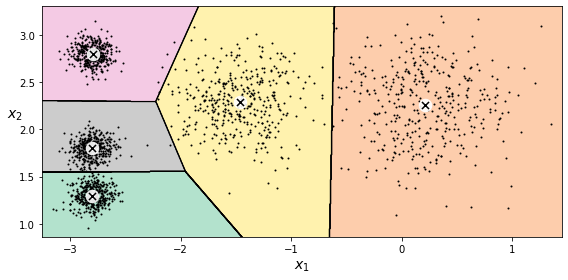

In [16]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
save_fig('voronoi_plot')
plt.show()

k-means 군집알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다. 왜냐하면 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문.

- hard clustering: 샘플을 하나의 클러스터에 할당하는 것
- sofrt clustering: 클러스터 마다 샘플에 점수를 부여하는 것(점수? 샘플과 센트로이드 사이의 거리, similarity score(친화성 점수) - 높을수록 해당 클러스터에 가깝다 등)

In [17]:
kmeans.transform(X_new) # 샘플과 각 센트로이드 사이의 거리를 반환

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

고차원 데이터 셋을 위와 같은 방식으로 변환하면, k-차원 데이터셋이 만들어진다. 이 변환은 매우 효율적인 비선형 차원 축소 기법이 될 수 있다.

In [18]:
# k-평균 알고리즘을 1,2,3회 반복하고 센트로이드의 움직임 확인

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

그림 저장: kmeans_algorithm_plot


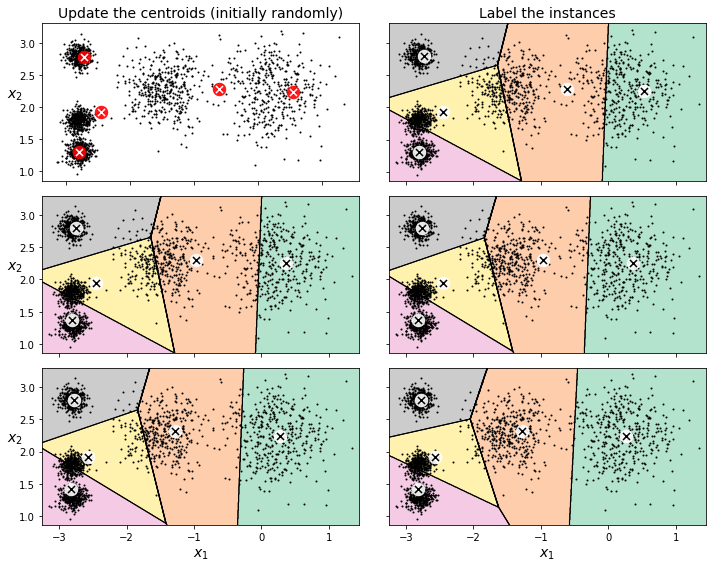

In [19]:
# 그래프 그려보기

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

#### 센트로이드 초기화 방법
랜덤하게 센트로이드를 선정하는 과정에서 운이 없었을 경우 최적의 솔루션을 제공하지 못할 수 있다. 그래서 센트로이드 초기화를 개선해 이런 위험을 줄이는 것이 필요하다.

- n_init: 랜덤 초기화 횟수, 디폴트 = 10 -> 10번 반복해서 최선의 솔루션 반환
- 최선의 솔루션을 찾는데 사용하는 성능 지표: 센트로이드 사이의 평균 제곱 거리 => 모델의 이너셔(inertia), 작을수록 좋다

In [20]:
kmeans.inertia_

211.59853725816828

In [21]:
# 이너셔 검증

X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816862

In [22]:
kmeans.score(X) 
"""사이킷런의 score()메서드는 항상 큰값이 좋은 것이라는 규칙을 따라야 하므로 음수로 반환

-211.59853725816836

##### k-평균++ 알고리즘

다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계를 거치는 알고리즘이다. KMeans 클래스는 이 초기화 방법을 사용한다.

In [ ]:
"""
초기화 방법

init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고
n_init을 1로 설정할 수 있다

good_init = np.array([[-3,3], [-3,2], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
"""

In [24]:
# 비교그래프 그리는 함수

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

### 최적의 클러스터 개수 찾기

- k값 이용: 좋은 방법이 아니다
- 실루엣 점수 이용

그림 저장: bad_n_clusters_plot


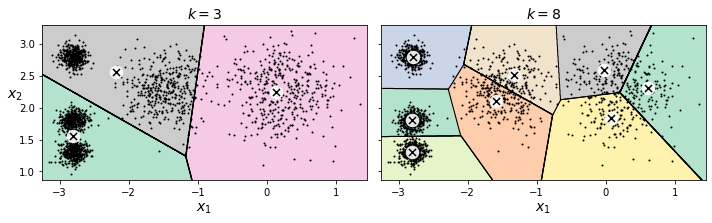

In [25]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [26]:
kmeans_k3.inertia_

653.2223267580945

In [27]:
kmeans_k8.inertia_ # 이너셔는 k값이 증가할수록 작아진다

118.44108623570084

In [28]:
# k값에 따른 이너셔값 보기

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

그림 저장: inertia_vs_k_plot


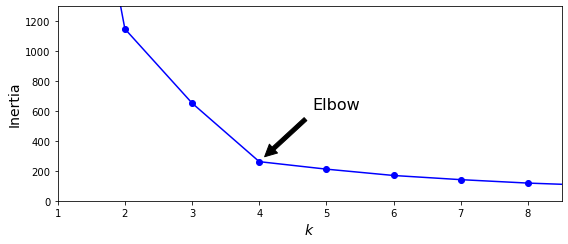

In [29]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

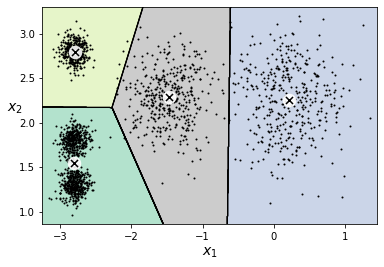

In [30]:
# k=4일 때 군집

plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

#### 실루엣 점수
실루엣 계수의 평균. 샘플의 실루엣 계수 = (b-a)/max(a,b) - a는 클러스터 내부 평균 거리, b는 가장 가까운 클러스터까지의 평균거리

- +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른클러스터와는 멀리 떨어져 있다는 뜻
- -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되어 있다는 의미

In [31]:
# k에 대한 실루엣 점수 보기

from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [33]:
silhouette_score = [silhouette_score(X, model.labels_)
                   for model in kmeans_per_k[1:]]

그림 저장: silhouette_score_vs_k_plot


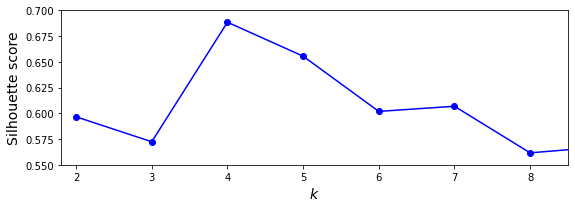

In [36]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

k=4에서 실루엣 점수가 가장 높지만, k=5도 나쁘지 않다.

실루엣 다이어그램: 모든 샘플의 실루엣 계수를 할당된 클러스터와 실루엣 값으로 정렬

그림 저장: silhouette_analysis_plot


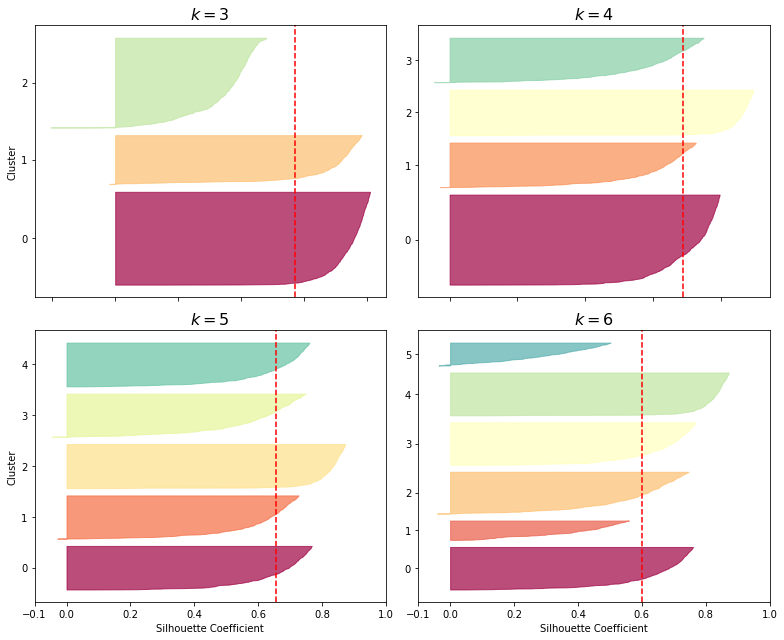

In [38]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

실루엣 점수는 k=4 일 때가 더 좋지만, 클러스터의 크기가 비슷한 것이 좋으므로 k=5를 선택하는 것이 좋다

### k-means 의 한계

1. 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 한다.
2. 클러스터의 개수를 지정해야 한다.
3. 밀집도가 다르거나, 원형이 아닐 경우 잘 작동하지 않는다